# 5 Oscillations

## 5.1 limit cycles

### 5.1.1 Rayleigh's clarinet

beschouw het model van Rayleigh's clarinet:
$$X'= V$$
$$V'= -X - (aV^3-V)$$
We zullen nu aantonen dat dit model weldegelijk een limietcyclus heeft door enkele trajecten te plotten startende van verschillende condities voor a=1:

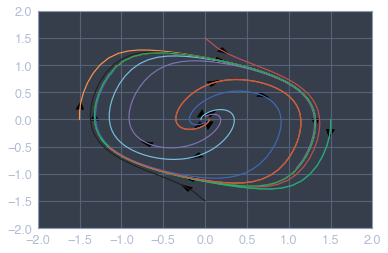

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def verandering(X,V):
    #u -> X'
    #v -> Y'
    u = V
    v = -X - (V**3 - V)
    return [u,v]

def euler(initx,inity,stapgrootte,periode):
    #initiële condities
    X = initx
    V = inity
    x = []
    y = []
    for i in range(0,periode):
        x.append(X)
        y.append(V)
        X += stapgrootte*verandering(x[-1],y[-1])[0]
        V += stapgrootte*verandering(x[-1],y[-1])[1]
    return x,y
# aantal startpunten:
thetas = np.linspace(0,2*np.pi,5)
coordinaten = []
for theta in thetas:
    coordinaten.append([1.5*np.cos(theta),1.5*np.sin(theta)])
    coordinaten.append([0.05*np.cos(theta),0.05*np.sin(theta)])
for coordinaat in coordinaten:
    x_i = coordinaat[0]
    y_i = coordinaat[1]
    x,y = euler(x_i,y_i,0.1,100)
    plt.plot(x,y)
    dx,dy = [],[]
    for i in range(len(x)):
        ver = verandering(x[i],y[i])
        dx.append(ver[0])
        dy.append(ver[1])
    m = np.hypot(dx,dy)
    for i in range(1, len(x), 50): #range(start,stop,step)
        plt.arrow(x[i], y[i], dx[i]/m[i]/30, dy[i]/m[i]/30, head_width=0.1, color='black')
    
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

In [2]:
%%capture
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
a_lijst = np.arange(-1,1,0.1)
fig, ax = plt.subplots()
x = np.arange(-1,1,0.01)

# animation function. This is called sequentially
def animate(i):
    ax.clear()
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.plot(x,-x-a_lijst[i]*x**3+x)
    ax.set_title('a={}'.format(a_lijst[i]))

# call the animator. blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate,frames=20, interval=100)

In [3]:
HTML(anim.to_jshtml())

Nu het effect van a op limit cycles:



In [4]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
a_lijst = np.arange(0.1,2,0.1)[::-1] #van achter naar voor
fig, ax = plt.subplots()
x = np.arange(-1,1,0.01)

def verandering(X,V,a):
    #u -> X'
    #v -> Y'
    u = V
    v = -X - (a*V**3 - V)
    return [u,v]

def euler(initx,inity,a,stapgrootte,periode):
    #initiële condities
    X = initx
    V = inity
    x = []
    y = []
    for i in range(0,periode):
        x.append(X)
        y.append(V)
        X += stapgrootte*verandering(x[-1],y[-1],a)[0]
        V += stapgrootte*verandering(x[-1],y[-1],a)[1]
    return x,y
'''
def init():
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-1,1)
    plt.ylim(-2,2)
'''
#this also works with an init with plt <-> ax
# animation function. This is called sequentially
def animate(i):
    ax.clear()
    ax.set_ylim(-1,1)
    ax.set_xlim(-2,2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    for coordinaat in coordinaten:
        x_i = coordinaat[0]
        y_i = coordinaat[1]
        x,y = euler(x_i,y_i,a_lijst[i],0.1,100)
        ax.plot(x,y)
    ax.set_title('a={}'.format(a_lijst[i]))
# call the animator. blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate,
                               frames=19, interval=100)
plt.close()

HTML(anim.to_jshtml())

Nu eens kijken of het lukt om op de attractor te starten:

In [5]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
a_lijst = np.arange(0.1,2,0.1)[::-1] #van achter naar voor
fig, ax = plt.subplots()
x = np.arange(-1,1,0.01)

def verandering(X,V,a):
    #u -> X'
    #v -> Y'
    u = V
    v = -X - (a*V**3 - V)
    return [u,v]

def euler(initx,inity,a,stapgrootte,periode):
    #initiële condities
    X = initx
    V = inity
    x = []
    y = []
    for i in range(0,periode):
        x.append(X)
        y.append(V)
        X += stapgrootte*verandering(x[-1],y[-1],a)[0]
        V += stapgrootte*verandering(x[-1],y[-1],a)[1]
    return x,y
'''
def init():
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-1,1)
    plt.ylim(-2,2)
'''
#this also works with an init with plt <-> ax
# animation function. This is called sequentially
def animate(i):
    ax.clear()
    ax.set_ylim(-1,1)
    ax.set_xlim(-2,2)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    x_i = 0
    if a_lijst[i] != 0:
        y_i = 1/np.sqrt(a_lijst[i])
    else:
        y_i = 0
    x,y = euler(x_i,y_i,a_lijst[i],0.1,100)
    ax.plot(x,y)
    ax.set_title('a={}'.format(a_lijst[i]))
# call the animator. blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate,
                               frames=19, interval=100)
plt.close()

HTML(anim.to_jshtml())

Dit lukt ongeveer in het punt (0,1/sqrt(a)), als we hier nu starten voor de time series:

In [6]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
a_lijst = np.arange(0.1,2,0.1)[::-1]
fig, ax = plt.subplots()
x = np.arange(-1,1,0.01)
T = np.arange(0,100,1)

def verandering(X,V,a):
    #u -> X'
    #v -> Y'
    u = V
    v = -X - (a*V**3 - V)
    return [u,v]

def euler(initx,inity,a,stapgrootte,periode):
    #initiële condities
    X = initx
    V = inity
    x = []
    y = []
    for i in range(0,periode):
        x.append(X)
        y.append(V)
        X += stapgrootte*verandering(x[-1],y[-1],a)[0]
        V += stapgrootte*verandering(x[-1],y[-1],a)[1]
    return x,y

# animation function. This is called sequentially
def animate(i):
    ax.clear()
    ax.set_ylim(-5,5)
    ax.set_xlim(0,100)
    ax.set_xlabel('tijd')
    ax.set_ylabel('afwijking')
    x_i = 0
    if a_lijst[i] != 0:
        y_i = 1/np.sqrt(a_lijst[i])
    else:
        y_i = 0
    x,y = euler(x_i,y_i,a_lijst[i],0.1,100)
    ax.plot(T,x)
    ax.set_title('a={}'.format(a_lijst[i]))
# call the animator. blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate,
                               frames=19, interval=100)
plt.close()

HTML(anim.to_jshtml())

Dan zien we dat harder blazen de frequentie niet verandert maar enkel de amplitude.

### 5.1.2 The Hypothalamic/Pituitary/Gonadal Hormonal Axis

model:
$$H' = \frac{1}{1+G^n} - k_1H$$

$$P' = H - k_2P$$

$$G' = P - k_3G$$

met $k_1 = k_2 = k_3 = 0.2$ en n=9.
Simuleer enkele trajecten van dit model met verschillende initiële condities. Wat zie je? Plot P,G en H in functie van de tijd.

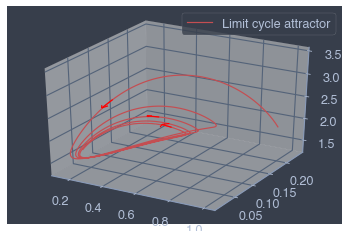

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')

def verandering(P,H,G):
    h = 1/(1+G**9) - 0.2*H
    p = H - 0.2*P
    g = P - 0.2*G
    return [p,h,g]

def euler(initx,inity,initz,stapgrootte,periode):
    #initiële condities
    P = initx
    H = inity
    G = initz
    x = []
    y = []
    z = []
    #Voor de pijlkes:
    dx = np.zeros(periode)
    dy = np.zeros(periode)
    dz = np.zeros(periode)
    for i in range(0,periode):
        x.append(P)
        y.append(H)
        z.append(G)
        dP = verandering(x[-1],y[-1],z[-1])[0]
        dH = verandering(x[-1],y[-1],z[-1])[1]
        dG = verandering(x[-1],y[-1],z[-1])[2]
        P += stapgrootte*dP
        H += stapgrootte*dH
        G += stapgrootte*dG
        dx[i] = dP
        dy[i] = dH
        dz[i] = dG
    return x,y,z,dx,dy,dz

x,y,z,dx,dy,dz = euler(1,0.2,2,0.1,1000)


for i in range(100,1000,400): #range(start,stop,step)
    ax.quiver(
        x[i],y[i],z[i], # <-- starting point of vector
        dx[i],dy[i],dz[i], # <-- directions of vector
        color = 'red'
    )

ax.plot(x, y, z, label='Limit cycle attractor',color='r')
ax.legend()
plt.show()

Nu in functie van de tijd:

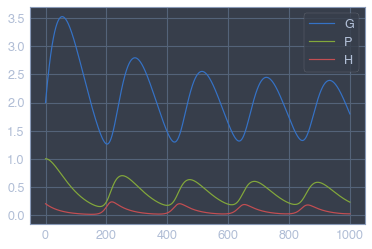

In [8]:
fig, ax = plt.subplots()
T = np.arange(0,1000,1)
G = plt.plot(T,z,label='G')
P = plt.plot(T,x,label='P')
H = plt.plot(T,y,label='H')
plt.legend()
plt.show()

Stel dat we 1 systeem wegnemen en dus overblijven met:
    
$$H' = \frac{1}{1+G^n} - k_1H$$

$$G' = H - k_3G$$

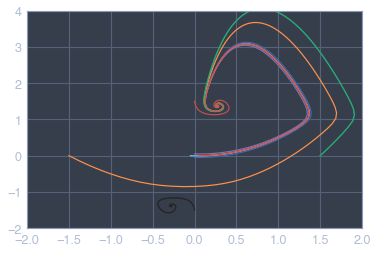

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def verandering(H,G):
    h = 1/(1+G**9) - 0.2*H
    g = H - 0.2*G
    return [h,g]

def euler(initx,inity,stapgrootte,periode):
    #initiële condities
    X = initx
    V = inity
    x = []
    y = []
    for i in range(0,periode):
        x.append(X)
        y.append(V)
        X += stapgrootte*verandering(x[-1],y[-1])[0]
        V += stapgrootte*verandering(x[-1],y[-1])[1]
    return x,y
# aantal startpunten:
thetas = np.linspace(0,2*np.pi,5)
coordinaten = []
for theta in thetas:
    coordinaten.append([1.5*np.cos(theta),1.5*np.sin(theta)])
    coordinaten.append([0.05*np.cos(theta),0.05*np.sin(theta)])
for coordinaat in coordinaten:
    x_i = coordinaat[0]
    y_i = coordinaat[1]
    x,y = euler(x_i,y_i,0.1,1000)
    plt.plot(x,y)
    
plt.xlim(-2,2)
plt.ylim(-2,4)
plt.show()

Zijn er duidelijk geen oscillaties meer.

## 5.2 Time delay

### 5.2.1 Respiratory control of CO2

p.187, de Mackey-Glass vergelijking:

$$X' = L - \frac{V_{max}X^n(t-\tau)}{1+X^n(t-\tau)}X$$

Voor deze oefening nemen we $L=6$ en $V_{max} = 16$. we nemen ook aan dat $X(t)=0.5$ $\forall$ $t\leq0$ , we integreren dit met euler's methode met een stapgrootte van 0.01 met n = 5 en $\tau$ = 0.2:

In [10]:
%matplotlib inline
T = np.arange(0,10,0.01)
tau = 0.2
fig, ax = plt.subplots()
n_lijst = np.arange(1,10,1)

def verandering(X,X_tau,n):
    return 6 - (16*X_tau**n)/(1 + X_tau**n)*X

def euler(X_init,n,tau=0.2,periode=len(T),stapgrootte=0.01):
    #initiële condities
    X = X_init
    x = []
    for i in range(0,periode):
        x.append(X)
        if T[i] <= tau: #kijken of t-\tau <= 0
            X_tau = 0.5
        else:
            X_tau = x[i - int(tau/stapgrootte)] #tau/stapgrootte geeft index van tijd
        X += stapgrootte*verandering(x[-1],X_tau,n)
    return x

# animation function. This is called sequentially
def animate(i):
    ax.clear()
    ax.set_xlim(0,10)
    ax.set_ylim(0,4)
    ax.set_xlabel('tijd')
    X = euler(2,n_lijst[i])
    ax.plot(T,X)
    ax.set_title('n={}'.format(n_lijst[i]))
    
# call the animator. blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate,
                               frames=len(n_lijst), interval=200)
plt.close()

HTML(anim.to_jshtml())

In [11]:
# animation function. This is called sequentially
tau_lijst = np.arange(0,1,0.1)
def animate(i):
    ax.clear()
    ax.set_xlim(0,10)
    ax.set_ylim(0,10)
    ax.set_xlabel('tijd')
    X = euler(2,9,tau_lijst[i])
    ax.plot(T,X)
    ax.set_title('tau={}'.format(tau_lijst[i]))
    
# call the animator. blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate,
                               frames=len(n_lijst), interval=200)
plt.close()

HTML(anim.to_jshtml())

We zien na enig experimenteren dat tau de frequentie en amplitude beïnvloed en n enkel de amplitude. Nu zullen we figuur 4.36 reconstruëren:

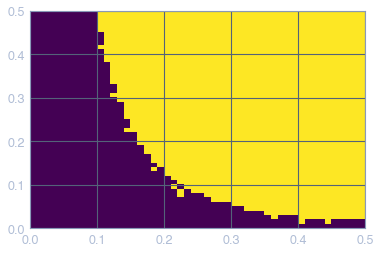

In [12]:
n_lijst = np.arange(0,0.5,0.01)
tau_lijst = np.arange(0,0.5,0.01)
T = np.arange(0,10,0.01)

def verandering(X,X_tau,n):
    return 6 - (16*X_tau**n)/(1 + X_tau**n)*X

def oscilleert(X_init,n,tau,periode=len(T),stapgrootte=0.01):
    #initiële condities
    X = X_init
    x = []
    count = 0
    momenteelteken = -1
    #Dit hier is allemaal euler:
    for i in range(0,periode):
        x.append(X)
        if T[i] <= tau: #kijken of t-\tau <= 0
            X_tau = 0.5
        else:
            X_tau = x[i - int(tau/stapgrootte)] #tau/stapgrootte geeft index van tijd
        #dit checkt of er tekenwissel optreedt (indicatie oscillatie)
        if np.sign(verandering(x[-1],X_tau,n)) != momenteelteken:
            count += 1
            momenteelteken = -momenteelteken
        X += stapgrootte*verandering(x[-1],X_tau,n)
    if count > 3:
        oscilleert = 1
    else:
        oscilleert = 0
        
    return oscilleert

matrix = np.zeros((len(n_lijst),len(tau_lijst))) #n_lijst rijen bij tau_lijst kolommen

for i,n in enumerate(n_lijst):
    for j,tau in enumerate(tau_lijst):
        matrix[i][j] = oscilleert(2,n,tau)
'''
Nu het plotten van deze matrix:
'''

extent = [0 , 0.5, 0 ,0.5]
#extent = [x_min , x_max, y_min , y_max]

afbeelding = plt.imshow(matrix,interpolation='nearest',origin='lower',extent=extent,aspect='auto') 

plt.show()

## 5.3 Hopf bifurcations

We bekijken nu het Holling-Tanner:
$$N' = N\left(1 - \frac{N}{7}\right) - w\frac{N}{1 + N}P$$

$$P' = 0.1P\left(1 - \frac{P}{N}\right)$$

we starten de analyse met $w = 0.3$

### 5.3.1 aantal oplossingen

Uit de 2de vergelijking zijn we dat bij equilibria N = P:

In [85]:
from sympy import *
N,P = symbols('N P')
N_ = N*(1 - N/7) - 0.3*(N*P)/(1 + N)
P_ = 0.1*P*(1 - P/N)
oplossingen = solve([N_, P_], [N, P]) #da way om 2 vgl op te lossen
print('Er zijn {} oplossingen, namelijk:'.format(len(oplossingen)))
print(oplossingen)

Er zijn 3 oplossingen, namelijk:
[(-1.33671568590896, -1.33671568590896), (5.23671568590896, 5.23671568590896), (7.00000000000000, 0.0)]


Hiervan zijn we enkel geïnteresseerd in de 2de aangezien de eerste niet fysisch is en de 3de niet interessant is (geen prooidieren en de roofdieren net de beginpopulatie)

### 5.3.2 Jacobiaan van de oplossingen

In [84]:
import numpy as np
jac = Matrix([N_, P_]).jacobian([N, P]) #da way om jac uit te rekenen
jac

Matrix([
[0.3*N*P/(N + 1)**2 - 2*N/7 - 0.3*P/(N + 1) + 1, -0.3*N/(N + 1)],
[                                 0.1*P**2/N**2,  0.1 - 0.2*P/N]])

Nu ingevuld hebben we:

In [42]:
jac_oplossing = jac.subs(N,oplossingen[1][0]).subs(P,oplossingen[1][1])
jac_oplossing

Matrix([
[-0.53659397061832, -0.251897759155863],
[              0.1,               -0.1]])

### 5.3.3 Bereken de eigenwaarden en eigenvectoren van de Jacobiaan

In [61]:
print('eigenwaarden:')
print(list(jac_oplossing.eigenvals()))
print('\nmet als corresponderende eigenvectoren:')
print([list(tup[2][0]) for tup in jac_oplossing.eigenvects()])

eigenwaarden:
[-0.468176262994507, -0.168417707623813]

met als corresponderende eigenvectoren:
[[0.965037233845796, -0.262112833129656], [-0.741760551460715, 1.08416457847316]]


De eigenwaarden zijn negatief en het equilibrium is dus stabiel

### 5.3.4 Schrijf een functie die automatisch print wel soort equilibrium er heerst

In [76]:
import numpy as np
def stabiliteit2D(eigenwaarden):
    eig1, eig2 = tuple(eigenwaarden)
    stabiliteit = np.zeros(5) #entry's met 1 corresponderen met: zie beneden
    if im(eig1) < 10**-10 and im(eig2) < 10**-10: #zo goed als reeël
        if eig1 < 0 and eig2 < 0:
            stab = "Stable node"
            stabiliteit[0] = 1
        elif eig1 > 0 and eig2 > 0:
            stab = "Unstable node"
            stabiliteit[1] = 1
        else:
            stab = "Saddle point"
            stabiliteit[2] = 1
    elif re(eig1) < 0:
        stab = "Stable spiral"
        stabiliteit[3] = 1
    else:
        stab = "Unstable spiral or limit cycle"
        stabiliteit[4] = 1
    return stab, stabiliteit



Proof of concept:

In [80]:
stab1,stabiliteit1 = stabiliteit2D((-1,-1))
print(stab1)
stab2,stabiliteit2 = stabiliteit2D((1,1))
print(stab2)
stab3,stabiliteit3 = stabiliteit2D((1,-1))
print(stab3)
stab4,stabiliteit4 = stabiliteit2D((-1,1j))
print(stab4)
stab5,stabiliteit5 = stabiliteit2D((1,1j))
print(stab5)

Stable node
Unstable node
Saddle point
Stable spiral
Unstable spiral or limit cycle


### 5.3.5 Onderzoek hoe het eq. afh is van w

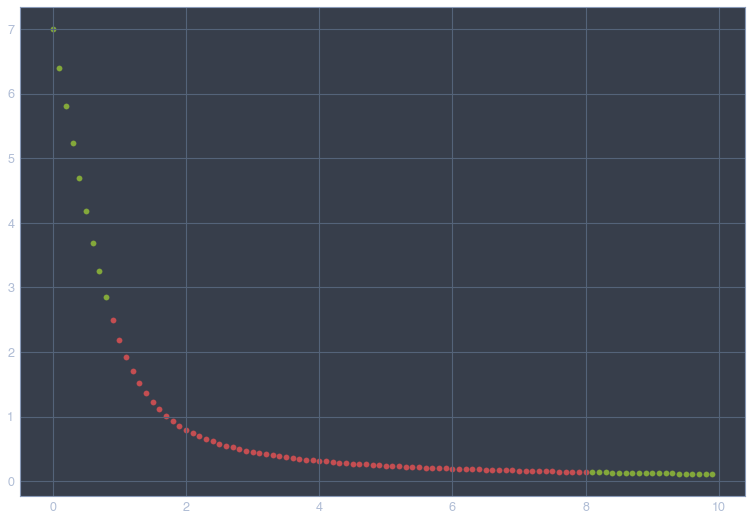

In [97]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1,figsize=(13, 9))
wLijst = np.arange(0,10,0.1)

N,P,W = symbols('N P w')
N_ = N*(1 - N/7) - W*(N*P)/(1 + N)
P_ = 0.1*P*(1 - P/N)

for w in wLijst:
    N_accent_ = N_.subs(W,w)
    oplossingen = solve([N_accent_, P_], [N, P])
    for Oplossing in oplossingen:
        if Oplossing[0] == Oplossing[1]:
            oplossing = Oplossing
    jac = Matrix([N_accent_, P_]).jacobian([N, P]).subs(N,oplossing[0]).subs(P,oplossing[1])
    eigenwaarden = jac.eigenvals()
    stab,stabiliteit = stabiliteit2D(eigenwaarden)
    if stabiliteit[0] == 1 or stabiliteit[3] == 1:
        ax.scatter(w, oplossing[0],color='g')
    else:
        ax.scatter(w, oplossing[0],color='r')



### 5.3.6 Plot het imaginaire en reeële deel van de eigenwaarden van w 

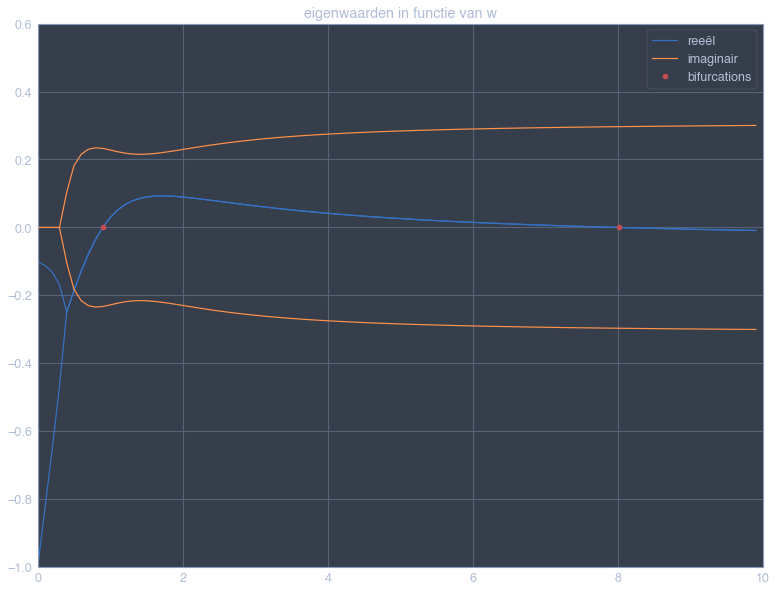

In [124]:

re1 = np.zeros(len(wLijst))
re2 = np.zeros(len(wLijst))
im1 = np.zeros(len(wLijst))
im2 = np.zeros(len(wLijst))



for i,w in enumerate(wLijst):
    N_accent_ = N_.subs(W,w)
    oplossingen = solve([N_accent_, P_], [N, P])
    for Oplossing in oplossingen:
        if Oplossing[0] == Oplossing[1]:
            oplossing = Oplossing
    jac = Matrix([N_accent_, P_]).jacobian([N, P]).subs(N,oplossing[0]).subs(P,oplossing[1])
    eigenwaarden = list(jac.eigenvals())
    re_temp = []
    im_temp = []
    for eigenwaarde in eigenwaarden:
        if re(eigenwaarde):
            re_temp.append(re(eigenwaarde))
        else:
            re_temp.append(0)
            
        if im(eigenwaarde):
            im_temp.append(im(eigenwaarde))
        else:
            im_temp.append(0)
    re_temp.sort() #kleinste vanvoor
    im_temp.sort()
    re1[i] = re_temp[0]
    re2[i] = re_temp[1]
    im1[i] = im_temp[0]
    im2[i] = im_temp[1]
    
#bifurcaties
bifls = []
for i in range(1, len(wLijst) - 2):
    if re1[i] < 0 < re1[i + 1] or re1[i] > 0 > re1[i + 1]:
        y1, y2 = re1[i], re1[i + 1]
        x1, x2 = wLijst[i], wLijst[i + 1]
        bifls.append(x1 - y1 * (x2 - x1) / (y2 - y1))

plt.figure(figsize=(13,10))
plt.title('eigenwaarden in functie van w')
plt.plot(wLijst,re1,color='b',label='reeël')
plt.plot(wLijst,re2,color='b')
plt.plot(wLijst,im1,color='y',label='imaginair')
plt.plot(wLijst,im2,color='y')
plt.plot(bifls, [0] * len(bifls), 'ro', label="bifurcations")
plt.xlim(0,10)
plt.ylim(-1,0.6)
plt.legend()
plt.show()